<a href="https://colab.research.google.com/github/SamiraHabib/Fake_News/blob/main/projeto_fake_news_3_FINAL_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de tópicos**

In [44]:
!pip install pyLDAvis

In [45]:
import pandas as pd
import numpy as np
 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
from nltk.stem import 	WordNetLemmatizer 
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')


from gensim.matutils import Sparse2Corpus
#from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [46]:
data_df = pd.read_json('https://raw.githubusercontent.com/SamiraHabib/Fake_News/main/fakeNews_FINAL.json')

In [47]:
data_df.head(2)

claim_datetime  ...                                       review_total
0  2019-12-13T00:00:00+00:00  ...  normandy summit results the eu plays on russia...
1  2019-09-26T00:00:00+00:00  ...  the us benefits from the attack on the saudi o...

[2 rows x 22 columns]

In [48]:
data_df.shape


(6238, 22)

##**Criar tokens, remover stop words e transformar no radical**

In [99]:
from gensim.utils import simple_preprocess

import spacy
from nltk.corpus import stopwords

**Lematização com spacy**

In [94]:
tags = ["NOUN", "ADJ", "VERB", "ADV"]

In [ ]:
nlp = spacy.load("en_core_web_sm", disable = ["parser", "ner"])

In [ ]:
lemma_text = []

for texts in data_df['review_total']:
  doc = nlp(texts)
  new_text = []
  for token in doc:
    if token.pos_ in tags:
      new_text.append(token.lemma_)
  
  final = " ".join(new_text)
  lemma_text.append(final)

**Pre-processamento simples com o gensim**

In [100]:
preprocess_text = []

for words in lemma_text:
  new = simple_preprocess(words, deacc = True)
  preprocess_text.append(new)

**Retirando stopwords**

In [51]:
stop_words = set(stopwords.words('english')) 

In [102]:
stopwords_list = []

for lists in preprocess_text:
  stop_temp = []

  for word in lists:
    if word not in stop_words:
      stop_temp.append(word)

  stopwords_list.append(stop_temp)

**Transformando no radical**

LEMMA

In [105]:
lemma = WordNetLemmatizer()

In [106]:
lemma_words = []

for lists in stopwords_list:
  lemma_temp = []

  for word in lists:
    lemma_temp.append(lemma.lemmatize(word))


  lemma_words.append(lemma_temp)

STEM

In [108]:
stemmer = RSLPStemmer()

In [109]:
stem_words = []

for lists in lemma_words:
  stem_temp = []

  for word in lists:
    stem_temp.append(stemmer.stem(word))


  stem_words.append(stem_temp)

In [110]:
data_df['stemmer'] = stem_words

In [111]:
data_df['stemmer'].head()

0    [summit, result, play, sid, betray, kyiv, brig...
1    [benefit, attack, saud, oil, recent, attack, s...
2    [polish, legion, organiz, historic, figur, est...
3    [may, use, eastern, cannon, fodd, new, larg, d...
4    [resolution, reliev, responsibility, beneficia...
Name: stemmer, dtype: object

In [112]:
data_df['preprocess'] = data_df['stemmer'].apply(lambda x: ' '.join(x))

In [113]:
data_df['preprocess']

0       summit result play sid betray kyiv bright futu...
1       benefit attack saud oil recent attack saud oil...
2       polish legion organiz historic figur establish...
3       may use eastern cannon fodd new larg degre bru...
4       resolution reliev responsibility beneficiary r...
                              ...                        
7360    turn land commodity sell exchang imfapparently...
7361    want divid want divid stat send troop money ar...
7362    clos succeed fail te apart russiath ukrainian ...
7363    falsifi history pact caus wwiith parliament fa...
7365    help terrorist lead offic say summit intellige...
Name: preprocess, Length: 6238, dtype: object

##**Gensim**

**criando corpus e dicionario gensim**

In [114]:
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

import matplotlib.pyplot as plt
%matplotlib inline

import pyLDAvis
import pyLDAvis.gensim_models as gensim_models
pyLDAvis.enable_notebook()

In [115]:
dictionary = corpora.Dictionary(stem_words)

In [116]:
dict(dictionary)

{0: 'accord',
 1: 'act',
 2: 'aggression',
 3: 'agre',
 4: 'agreement',
 5: 'ahead',
 6: 'aim',
 7: 'ally',
 8: 'along',
 9: 'already',
 10: 'als',
 11: 'alway',
 12: 'antiukrainian',
 13: 'armed',
 14: 'articl',
 15: 'authority',
 16: 'basil',
 17: 'betray',
 18: 'big',
 19: 'bleak',
 20: 'bright',
 21: 'call',
 22: 'carry',
 23: 'cas',
 24: 'challeng',
 25: 'civil',
 26: 'claim',
 27: 'cle',
 28: 'collaps',
 29: 'comethil',
 30: 'commit',
 31: 'common',
 32: 'complet',
 33: 'conclusion',
 34: 'confident',
 35: 'conflict',
 36: 'confrontation',
 37: 'continu',
 38: 'cost',
 39: 'could',
 40: 'decl',
 41: 'destroy',
 42: 'dictat',
 43: 'disinformation',
 44: 'disintegrat',
 45: 'disintegration',
 46: 'do',
 47: 'early',
 48: 'end',
 49: 'enjoy',
 50: 'equipment',
 51: 'even',
 52: 'eventually',
 53: 'evidenc',
 54: 'expect',
 55: 'extern',
 56: 'fabricat',
 57: 'fac',
 58: 'falsehood',
 59: 'find',
 60: 'fir',
 61: 'forc',
 62: 'foreign',
 63: 'format',
 64: 'formation',
 65: 'french',

In [117]:
corpus = [dictionary.doc2bow(text) for text in data_df['stemmer']]

In [118]:
corpus

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 1),
  (20, 2),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 3),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 2),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 2),
  (63, 3),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 3),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 2),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 3),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 3)

**valores otimos da lda segundo a coerência UMASS**

In [119]:
model_list = []
coherence_list = []

for num_topic in range(5, 100, 5):
  lda = LdaModel(corpus= corpus, id2word= dictionary, num_topics= num_topic)
  model_list.append(lda)

  coherence = CoherenceModel(model= lda, dictionary = dictionary, texts= data_df['stemmer'], coherence='u_mass')
  coherence_list.append(coherence.get_coherence())


A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np

In [120]:
x = range(5, 100, 5)

for n, cohe in zip(x, coherence_list):
  print(f"Tópico {n}", f"tem valor:{round(cohe, 4)}")

Tópico 5 tem valor:-1.5114
Tópico 10 tem valor:-1.9328
Tópico 15 tem valor:-2.1469
Tópico 20 tem valor:-2.6558
Tópico 25 tem valor:-2.6909
Tópico 30 tem valor:-3.5888
Tópico 35 tem valor:-3.0624
Tópico 40 tem valor:-3.631
Tópico 45 tem valor:-4.0985
Tópico 50 tem valor:-4.233
Tópico 55 tem valor:-4.2162
Tópico 60 tem valor:-4.5355
Tópico 65 tem valor:-4.8398
Tópico 70 tem valor:-4.8455
Tópico 75 tem valor:-5.2315
Tópico 80 tem valor:-5.2765
Tópico 85 tem valor:-5.3908
Tópico 90 tem valor:-5.1817
Tópico 95 tem valor:-5.111


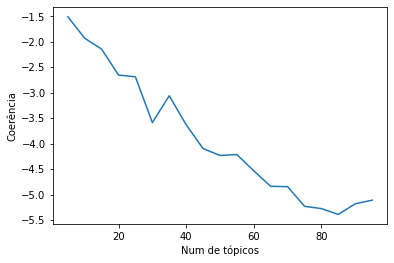

In [121]:

plt.plot(x, coherence_list)
plt.xlabel("Num de tópicos")
plt.ylabel("Coerência")
plt.show()


##**LDA**

In [122]:
lda_model = LdaModel(corpus= corpus, id2word= dictionary, num_topics= 5)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

##**Avaliando o modelo**

In [123]:
#Perplexity 
perp = lda_model.log_perplexity(corpus)

A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np

In [124]:
#Coherence
coher = CoherenceModel(model= lda_model, dictionary = dictionary, texts= data_df['stemmer'], coherence='u_mass')

In [125]:
print("Perplexity: ", perp )
print("Coherency: ", coher.get_coherence())

Perplexity:  -7.79877652970647
Coherency:  -1.7913655747794004


##**PyLDAvis**

**Unidimensional**

In [89]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.7/dist-packages (1.2.5)


In [126]:
 gensim_models.prepare(lda_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.066901 -0.000950       1        1  26.314948
1     -0.010369  0.057583       2        1  24.721140
4     -0.060358 -0.088018       3        1  21.408103
0      0.074418 -0.016802       4        1  14.981869
3     -0.070591  0.048187       5        1  12.573941, topic_info=               Term         Freq        Total Category  logprob  loglift
167          attack  1484.000000  1484.000000  Default  30.0000  30.0000
1057         chemic   726.000000   726.000000  Default  29.0000  29.0000
1216  investigation   888.000000   888.000000  Default  28.0000  28.0000
533          weapon   844.000000   844.000000  Default  27.0000  27.0000
1073      terrorist   678.000000   678.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
196        narrativ   220.607526  2512.381453   Topic5  -5.3687  -0.3591
90         military   198.658607  1951.042393   Topic5  -5.4735  -0.2110
154             war   185.544297  1956.538631   Topic5  -5.5418  -0.2821
367         country   187.942499  2628.919238   Topic5  -5.5290  -0.5646
139            stat   188.266046  2861.053958   Topic5  -5.5273  -0.6475

[467 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
4958       1  0.012379   abus
4958       2  0.037136   abus
4958       3  0.049514   abus
4958       4  0.891260   abus
4958       5  0.012379   abus
...      ...       ...    ...
10498      1  0.031886  zvezd
10498      2  0.031886  zvezd
10498      3  0.031886  zvezd
10498      4  0.031886  zvezd
10498      5  0.892809  zvezd

[1272 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 4])

**Bidimensional**

In [127]:
 gensim_models.prepare(lda_model, corpus, dictionary,mds='mmds' )

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: D

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.050102  0.074835       1        1  26.313002
1     -0.000723 -0.084624       2        1  24.719504
4     -0.104368 -0.037947       3        1  21.410391
0     -0.047047  0.095409       4        1  14.981209
3      0.102036 -0.047673       5        1  12.575893, topic_info=               Term         Freq        Total Category  logprob  loglift
167          attack  1484.000000  1484.000000  Default  30.0000  30.0000
1057         chemic   727.000000   727.000000  Default  29.0000  29.0000
1216  investigation   889.000000   889.000000  Default  28.0000  28.0000
533          weapon   844.000000   844.000000  Default  27.0000  27.0000
1073      terrorist   679.000000   679.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
196        narrativ   220.641781  2512.368721   Topic5  -5.3687  -0.3591
90         military   198.689454  1950.988582   Topic5  -5.4735  -0.2110
154             war   185.573108  1956.468225   Topic5  -5.5418  -0.2821
367         country   187.971682  2628.855809   Topic5  -5.5290  -0.5646
139            stat   188.295280  2860.959550   Topic5  -5.5273  -0.6475

[467 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
4958       1  0.012379   abus
4958       2  0.037137   abus
4958       3  0.049516   abus
4958       4  0.891293   abus
4958       5  0.012379   abus
...      ...       ...    ...
10498      1  0.031882  zvezd
10498      2  0.031882  zvezd
10498      3  0.031882  zvezd
10498      4  0.031882  zvezd
10498      5  0.892685  zvezd

[1272 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 4])

**Multidimensional**

In [128]:
 gensim_models.prepare(lda_model, corpus, dictionary,mds='tsne')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  26.314486
1       51.163364 -159.968018       2        1  24.717763
4      -73.144554   21.523815       3        1  21.407252
0      -66.410133 -110.606438       4        1  14.980919
3       54.417324   12.443444       5        1  12.579580, topic_info=               Term         Freq        Total Category  logprob  loglift
167          attack  1484.000000  1484.000000  Default  30.0000  30.0000
1057         chemic   727.000000   727.000000  Default  29.0000  29.0000
1216  investigation   888.000000   888.000000  Default  28.0000  28.0000
533          weapon   844.000000   844.000000  Default  27.0000  27.0000
1073      terrorist   679.000000   679.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
196        narrativ   220.706460  2512.320473   Topic5  -5.3687  -0.3590
90         military   198.747698  1951.000649   Topic5  -5.4735  -0.2110
154             war   185.627506  1956.535180   Topic5  -5.5418  -0.2821
367         country   188.026784  2628.847626   Topic5  -5.5290  -0.5646
139            stat   188.350476  2860.948693   Topic5  -5.5273  -0.6475

[467 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
4958       1  0.012379   abus
4958       2  0.037138   abus
4958       3  0.049517   abus
4958       4  0.891315   abus
4958       5  0.012379   abus
...      ...       ...    ...
10498      1  0.031873  zvezd
10498      2  0.031873  zvezd
10498      3  0.031873  zvezd
10498      4  0.031873  zvezd
10498      5  0.892456  zvezd

[1272 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 4])